# Trapezium method for integration

In calculus, the trapezium rule is a method for approximating definite integrals. The trapezium rule works by approximating region under the curve of a function $f(x)$ as a trapezoid (approximating the function using straight line approximations).

Using just one trapezoid the approximation becomes,
$$\int_a^b f(x) dx \approx (b-a) \cdot \frac{1}{2} \left( f(b) + f(a) \right)$$

When approximating using $n$ points (i.e., $n-1$ trapezoids), we would have to evaluate the function $f(x)$ at those $n$ points,

![resources/trapezium-1.png](resources/trapezium-1.png)

and then the approximation would be,
$$\int_a^b f(x) dx \approx \frac{h}{2} \left( f(x_0) + 2f(x_1) + 2f(x_2) + \dots + 2f(x_{n-1}) + f(x_n) \right)$$
$$\implies \int_a^b f(x) dx \approx \frac{h}{2} \left( f(x_0) + \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right)$$

It is quite exident from the above illustration that as n increases the value of integration will be more and more accurate.
Therefore as $n \rightarrow \infty$, our approximation will reach its exact value.


## Code

In [1]:
from numpy import empty, pi, sin, exp, square
from matplotlib import pyplot as plt

# Default configuaration for matplotlib
plt.style.use(['science', 'ieee'])
plt.rcParams["figure.figsize"] = (10, 5)


In [2]:
# Function to generate `n` evenly spaced points between limits `a` and `b`
def generate_points(a, b, n, retstep=False):

    # Calculating the spacing (difference) between each points
    h = (b - a) / (n - 1)

    # Creating an empty array to store the points
    points = empty(n)

    # Generating the points
    for i in range(n):
        points[i] = a
        a += h

    # Returning the difference between each points if asked for
    if retstep:
        return points, h

    return points


In [3]:
def integrate_trapezium(f, x_i, x_f, n):

    # Generating points
    x, h = generate_points(x_i, x_f, n, retstep=True)

    # Evaluating the function `f(x)` for each points
    y = f(x)

    # Declaring a variable to store the integral
    integral = 0

    # Evaluating the integral using Trapezium method
    for i in range(1, n):
        integral += y[i]

    integral = (h / 2) * (y[0] + 2 * integral + y[n - 1])

    return integral


## Examples

### $$\int_{0}^{2\pi} sin(x) \cdot dx$$

In [4]:
def f(x):
    return sin(x)


x_i = 0
x_f = 2 * pi
n = 1000


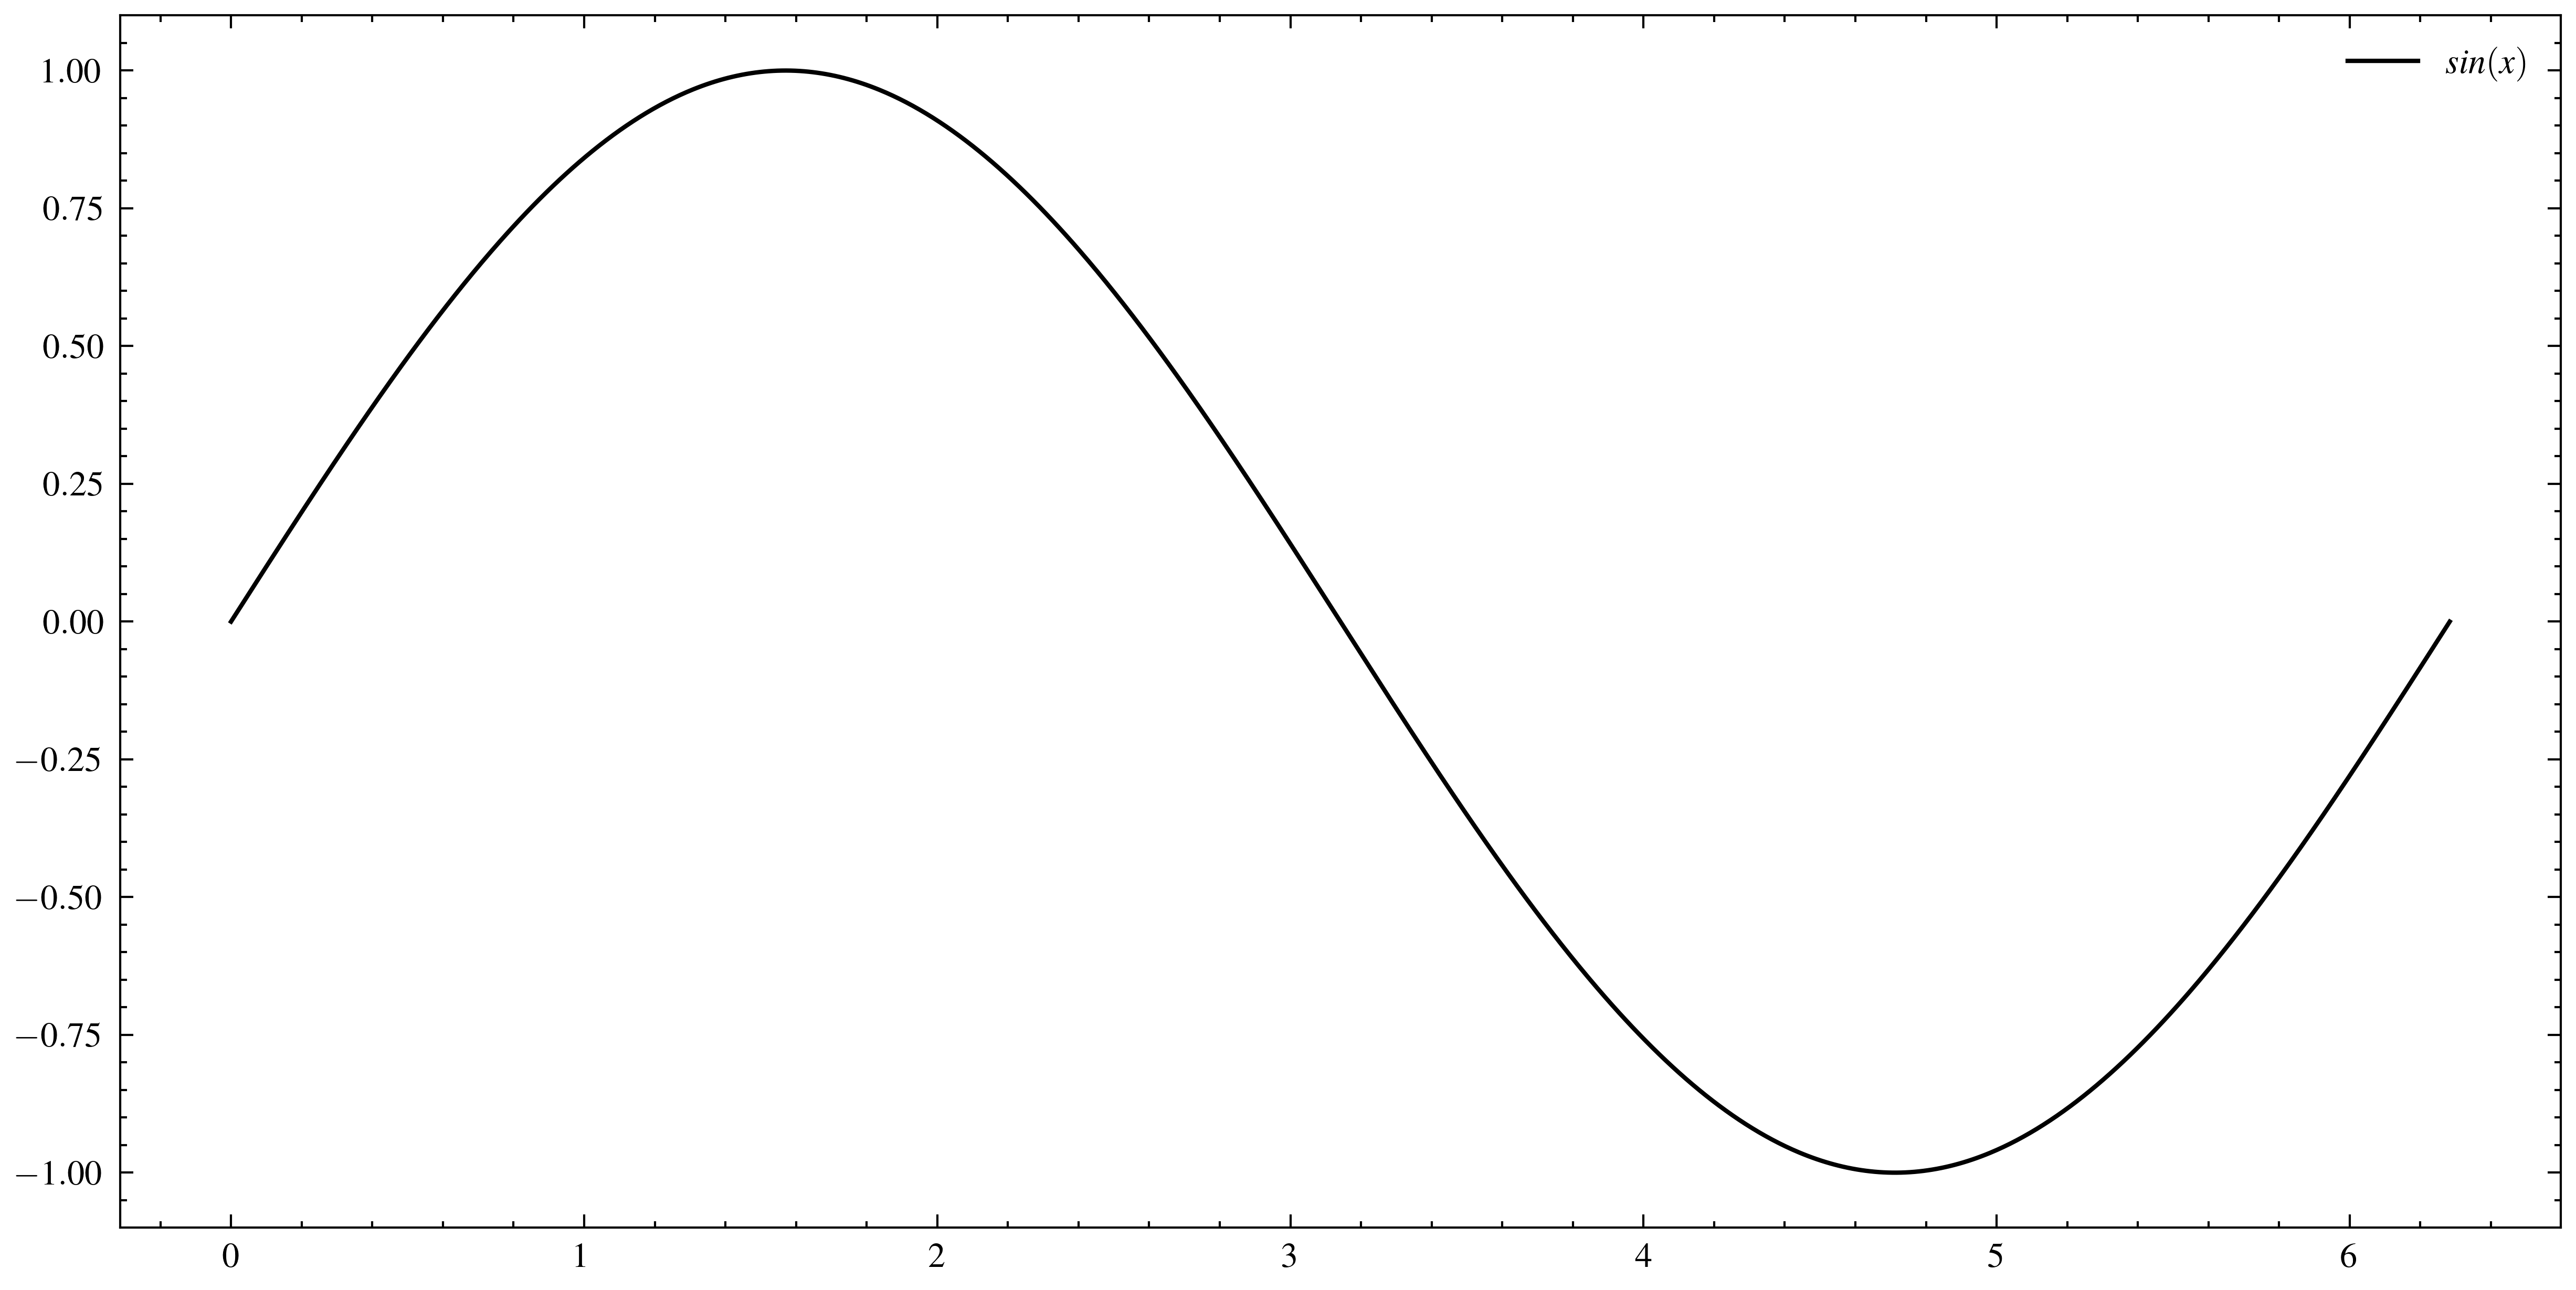

In [5]:
x = generate_points(x_i, x_f, n)
plt.plot(x, f(x), label="$sin(x)$")
plt.legend()
plt.show()


In [6]:
integrate_trapezium(f, x_i, x_f, n)


1.1556633208689454e-13

### $$\int_{-\pi}^{\pi} e^{-x^2} \cdot dx$$

In [7]:
def f(x):
    return exp(-(square(x)))


x_i = - pi
x_f = pi
n = 1000


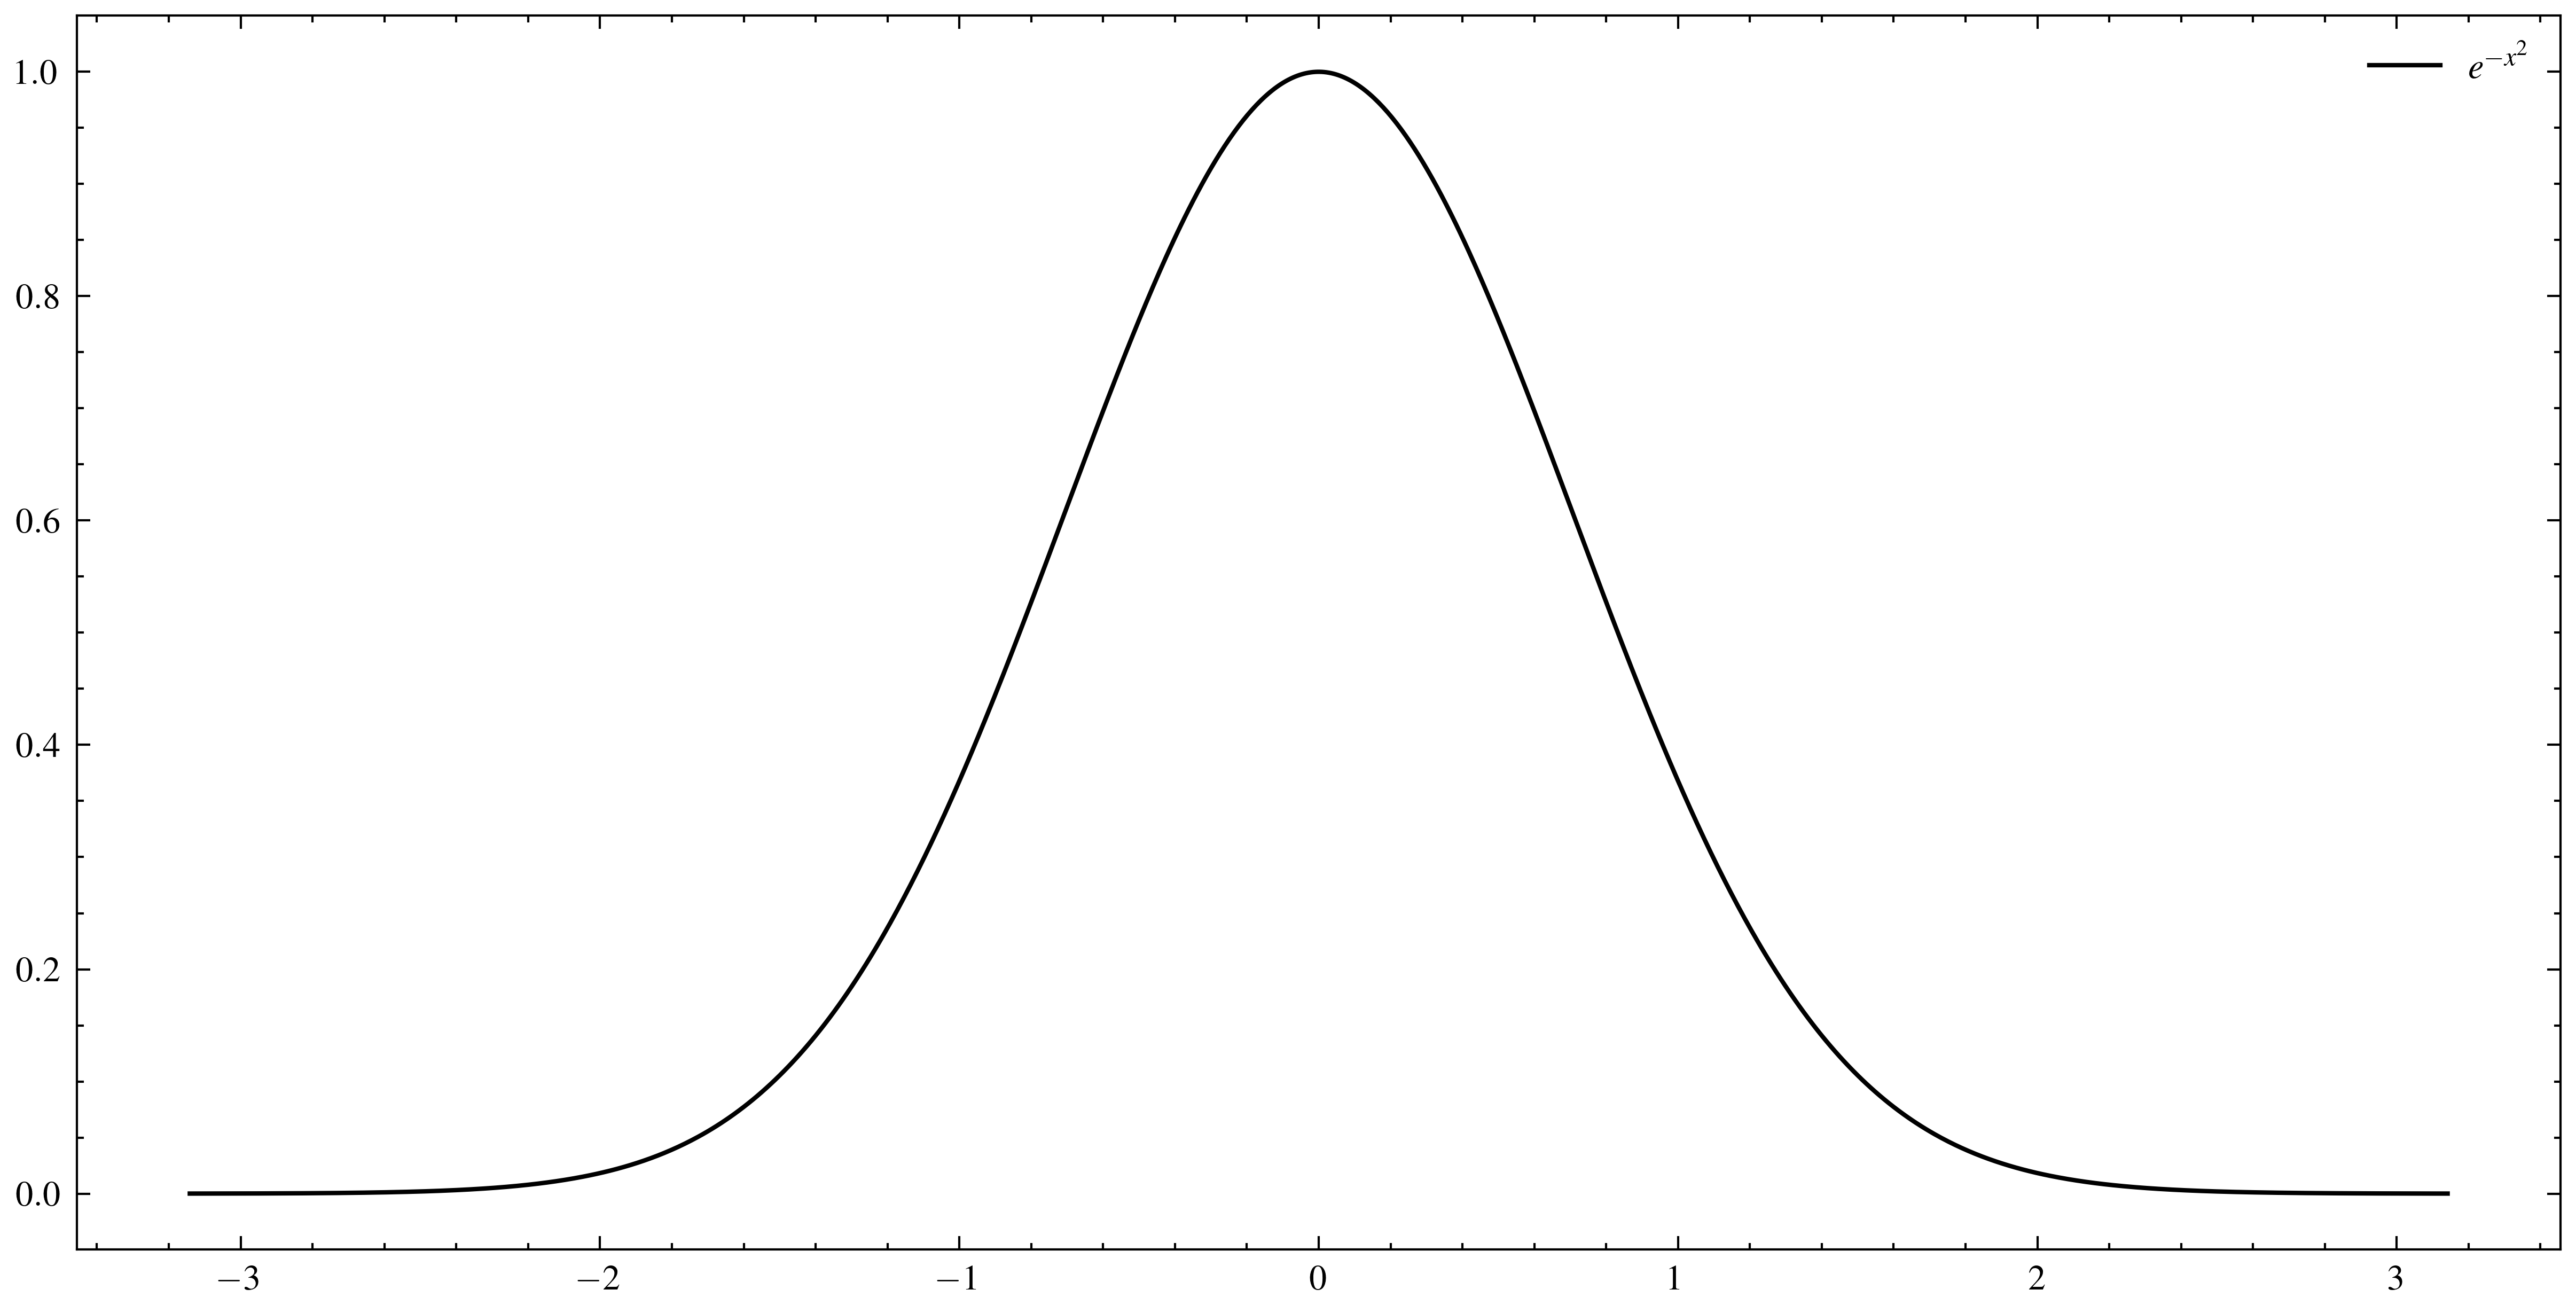

In [8]:
x = generate_points(x_i, x_f, n)
plt.plot(x, f(x), label="$e^{-x^2}$")
plt.legend()
plt.show()


In [9]:
integrate_trapezium(f, x_i, x_f, n)


1.7724384415148215

### $$\int_{\frac{a-\pi}{b}}^{\frac{a+\pi}{b}} e^{-(a-bx)^2} \cdot dx$$
for, $$a = 1000, \; b = 0.1$$

In [10]:
a = 1000
b = 0.5


def f(x, a=a, b=b):
    return exp(-(square(a - b * x)))


x_i = (a - pi) / b
x_f = (a + pi) / b
n = 1000


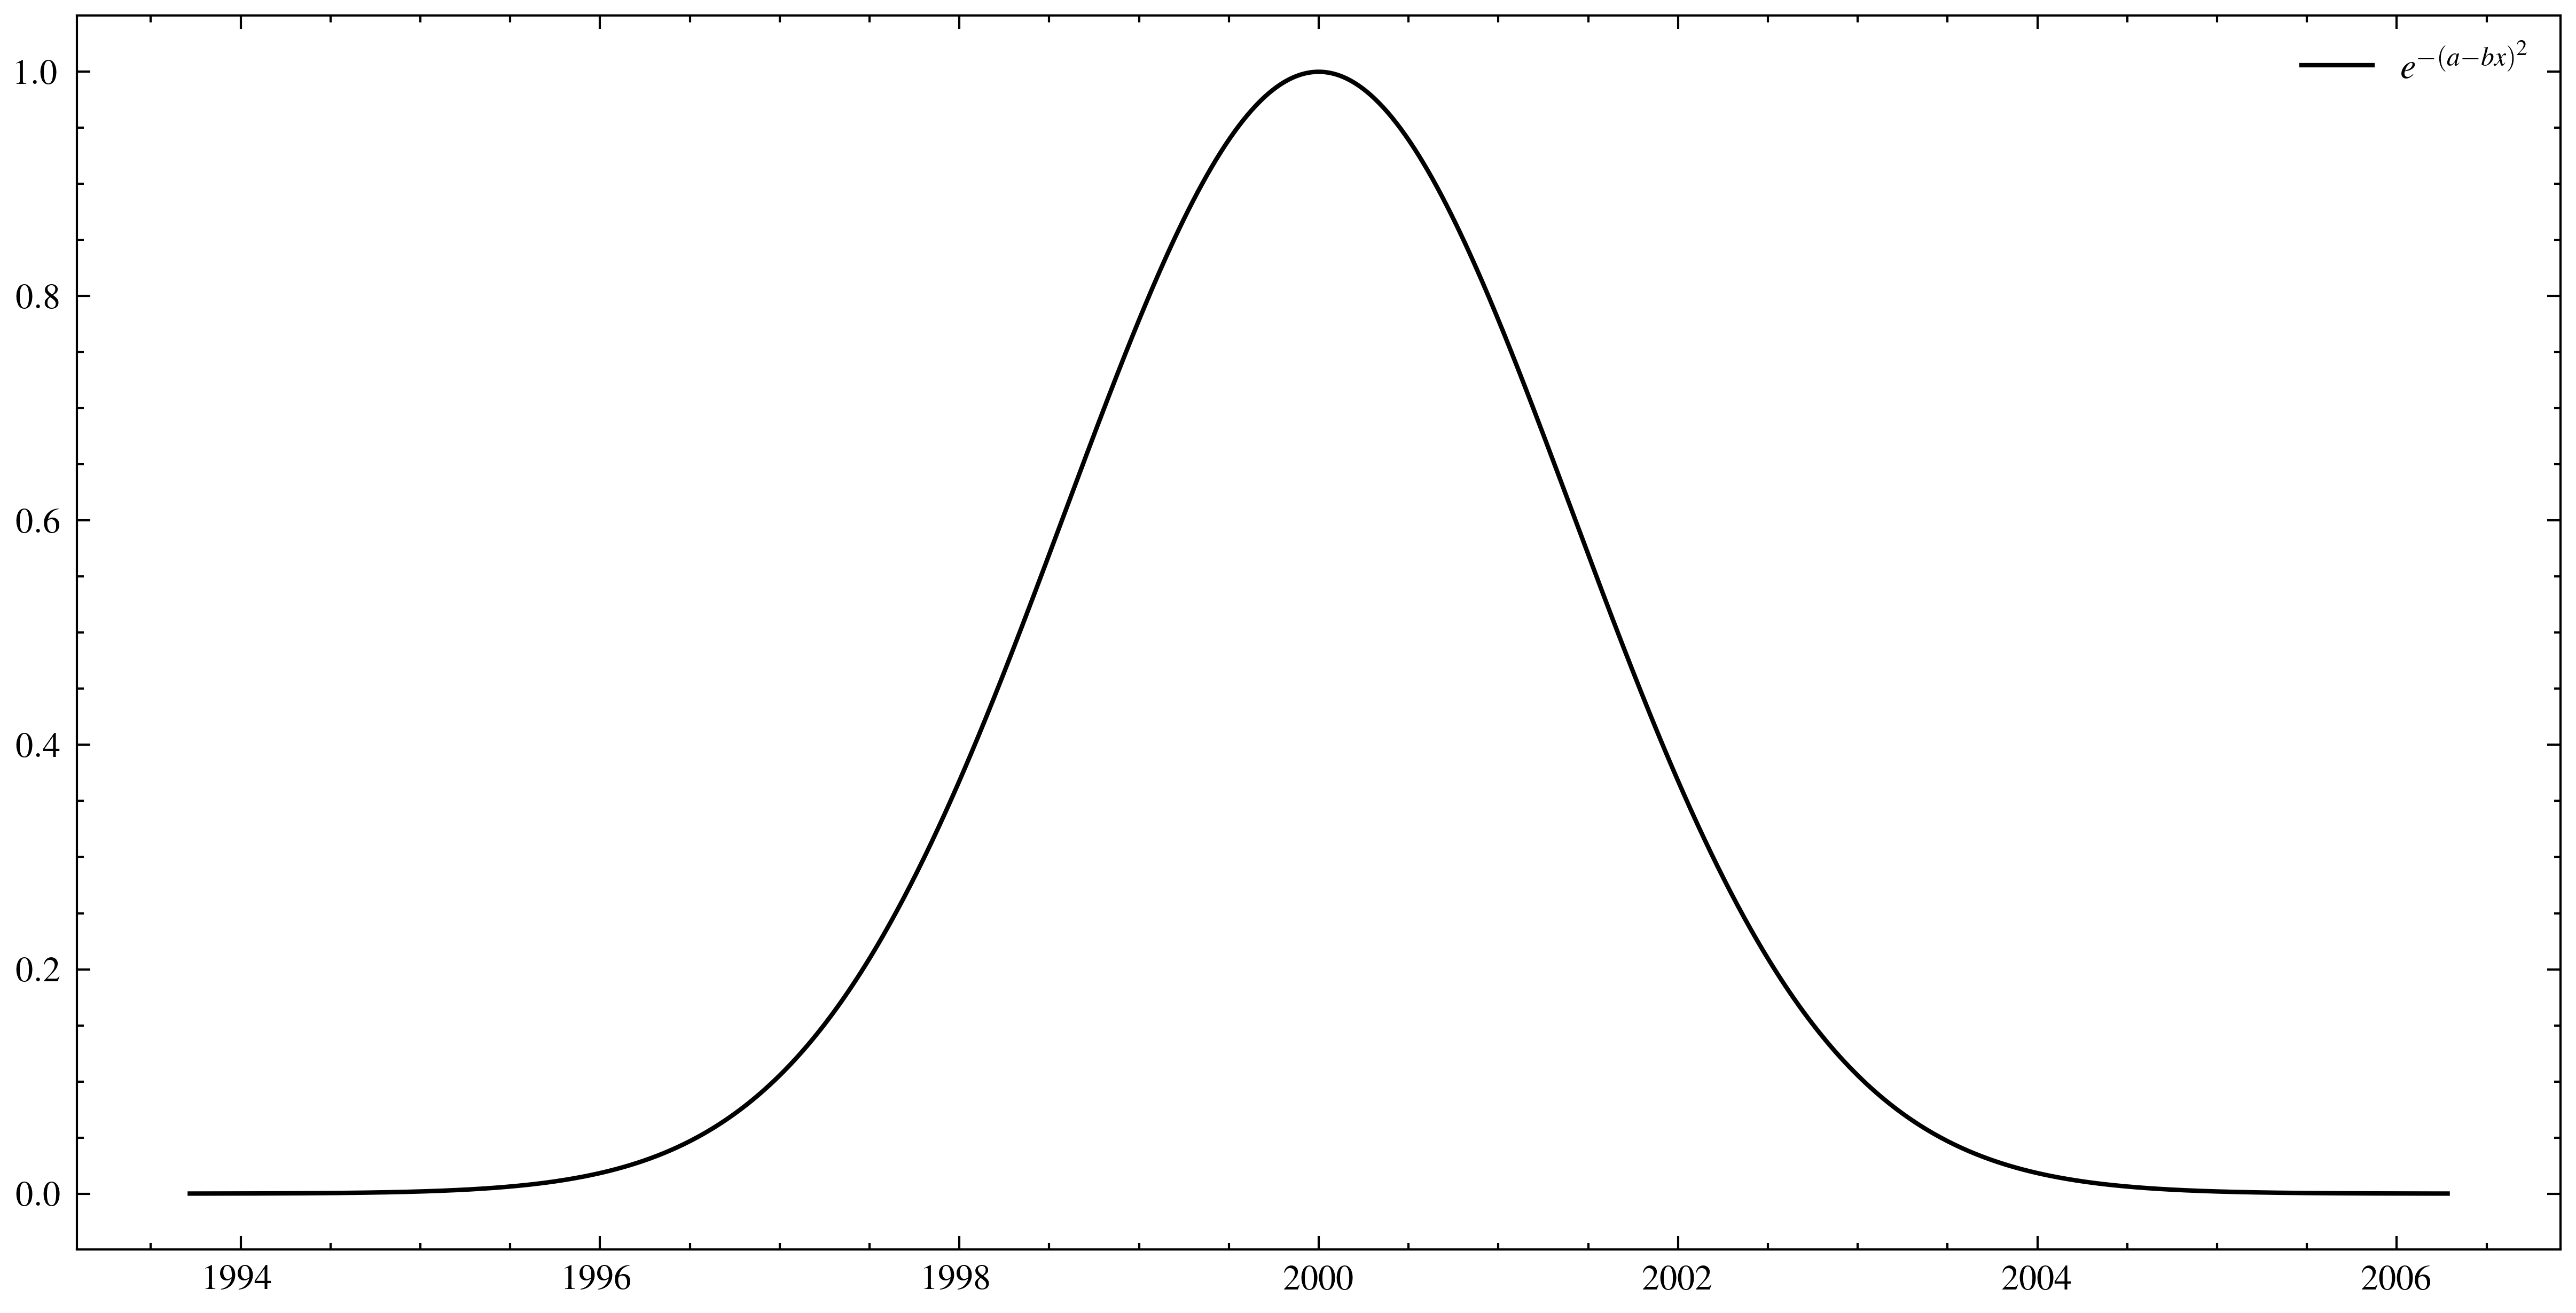

In [11]:
x = generate_points(x_i, x_f, n)
plt.plot(x, f(x), label="$e^{-(a-bx)^2}$")
plt.legend()
plt.show()


In [12]:
integrate_trapezium(f, x_i, x_f, n)


3.5448768830274022

### $$\int_{-\pi}^{\pi} x^2 e^{-x^2} \cdot dx$$

In [13]:
def f(x):
    return square(x) * exp(-(square(x)))


x_i = - pi
x_f = pi
n = 1000


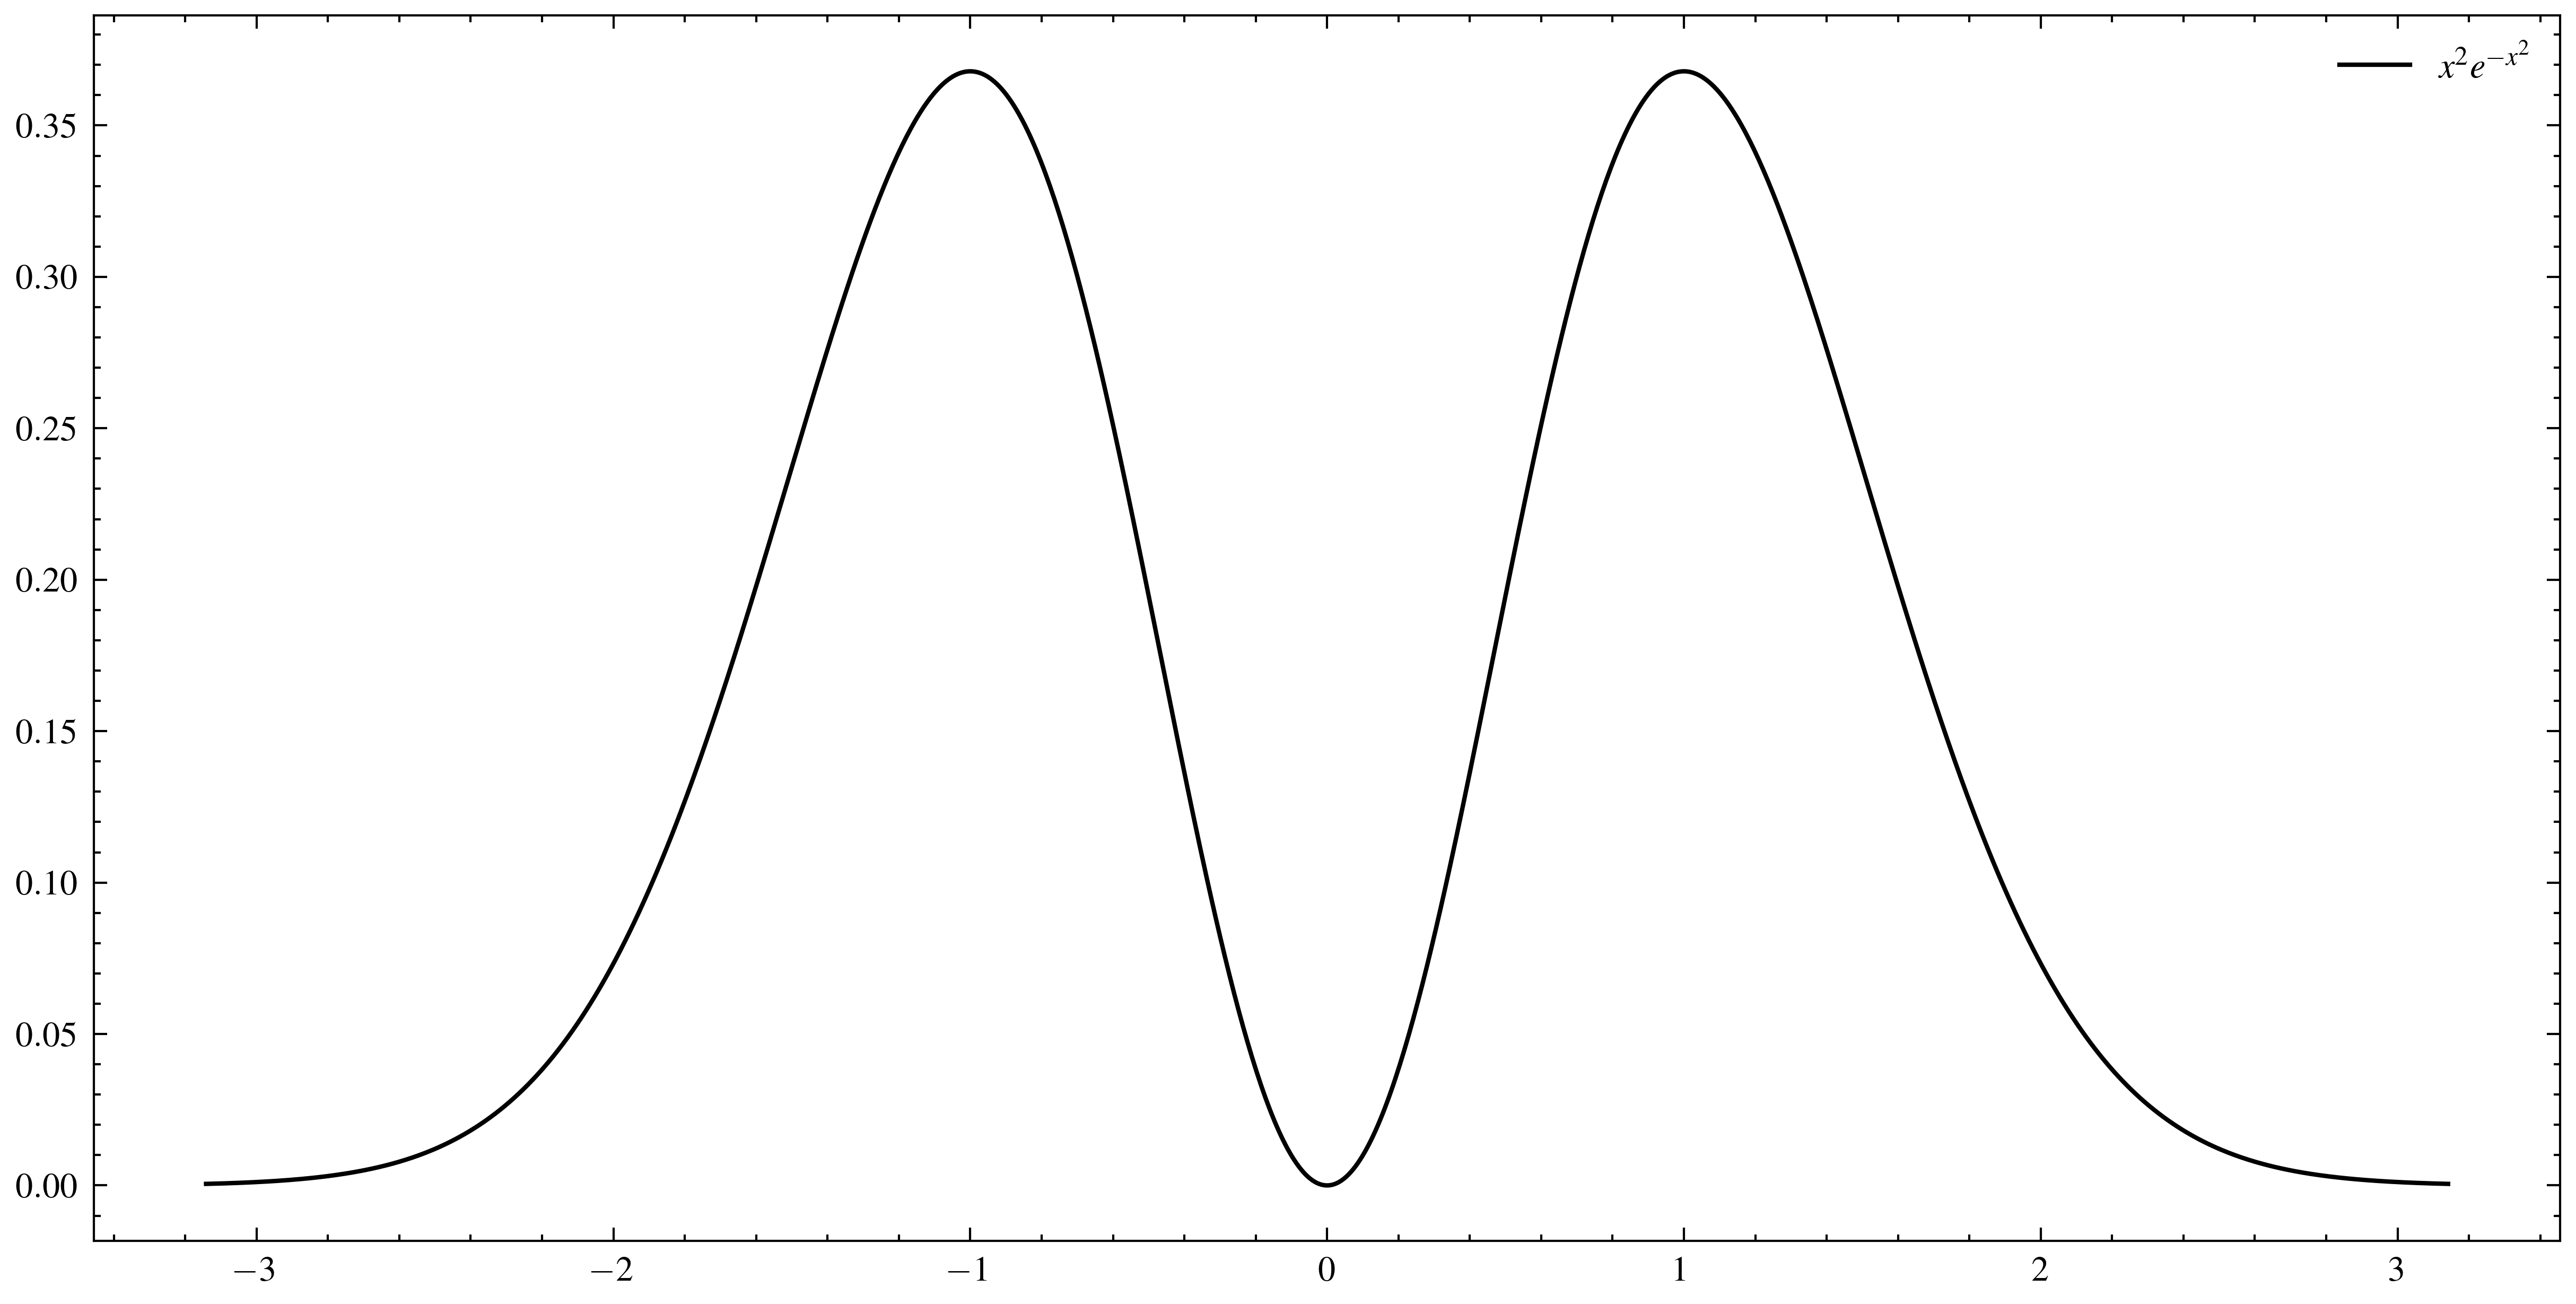

In [14]:
x = generate_points(x_i, x_f, n)
plt.plot(x, f(x), label="$x^2e^{-x^2}$")
plt.legend()
plt.show()


In [15]:
integrate_trapezium(f, x_i, x_f, n)


0.8860597576848352